### IMPORTACIÓN LIBRERÍAS:

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### CARGA DATAFRAME:

In [2]:
df = pd.read_csv("HR_RAW_DATA.csv")
df.head (20)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


### FUNCIÓN PARA EXPLORAR DATAFRAME

In [3]:
def explorar_dataset(df): # Función para una visión general del dataset

    print("Tamaño del dataset:")# Tamaño del dataset (filas y columnas)
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}") # Tamaño del dataset (filas y columnas)
    print("\nPrimeras 5 filas:") # Visualización primeras 5 filas
    display(df.head()) 
    print("\nTipos de datos:") # Tipos de datos por columna
    display(df.dtypes)
    print("\nValores_nulos:") 
    display(df.isnull().sum())

# Llamamos a la función para ver los datos
explorar_dataset(df)

Tamaño del dataset:
Filas: 1614, Columnas: 42

Primeras 5 filas:


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0



Tipos de datos:


Unnamed: 0                    int64
Age                          object
Attrition                    object
BusinessTravel               object
DailyRate                    object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
employeecount                 int64
employeenumber               object
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                   object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                   int64
NUMCOMPANIESWORKED            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating            object
RelationshipSatisfaction      int64
StandardHours               


Valores_nulos:


Unnamed: 0                     0
Age                            0
Attrition                      0
BusinessTravel               772
DailyRate                      0
Department                  1312
DistanceFromHome               0
Education                      0
EducationField               745
employeecount                  0
employeenumber               431
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                651
MonthlyIncome                843
MonthlyRate                    0
NUMCOMPANIESWORKED             0
Over18                       901
OverTime                     676
PercentSalaryHike              0
PerformanceRating            195
RelationshipSatisfaction       0
StandardHours               1195
StockOptionLevel               0
TOTALWORKINGYEARS            526
TrainingTi

### VISUALIZANDO PORCENTAJES NULOS:

In [4]:
def organizar_nulos(df):
   
    resumen = []

    for columna in df.columns:
        # Calculamos en una variable nueva el porcentaje de nulos de cada columna
        nulos_pct = (df[columna].isnull().sum() / len(df)) * 100
        
        # Incluimos solo columnas con nulos, diferenciando si son numéricas o categóricas
        if nulos_pct > 0:
            tipo = "Numérica" if df[columna].dtype in ['int64', 'float64'] else "Categórica"

            # Agregamos estos datos al resumen
            resumen.append({
                "Columna": columna,
                "Tipo": tipo,
                "Porcentaje_Nulos": nulos_pct
            })

    # Convertimos la lista a DataFrame y ordenamos por porcentaje de nulos (orden descendente)
    resumen_df = pd.DataFrame(resumen).sort_values(by="Porcentaje_Nulos", ascending=False)
    return resumen_df


resumen_nulos = organizar_nulos(df)
print(resumen_nulos)         

                Columna        Tipo  Porcentaje_Nulos
15       NUMBERCHILDREN    Numérica        100.000000
12   YearsInCurrentRole  Categórica         97.893432
1            Department  Categórica         81.288724
14      RoleDepartament  Categórica         81.288724
9         StandardHours  Categórica         74.039653
6                Over18  Categórica         55.824040
5         MonthlyIncome  Categórica         52.230483
13  SameAsMonthlyIncome  Categórica         52.230483
0        BusinessTravel  Categórica         47.831475
2        EducationField  Categórica         46.158612
7              OverTime  Categórica         41.883519
4         MaritalStatus  Categórica         40.334572
10    TOTALWORKINGYEARS  Categórica         32.589839
3        employeenumber  Categórica         26.703841
8     PerformanceRating  Categórica         12.081784
11      WORKLIFEBALANCE  Categórica          6.691450


### ELIMINANDO COLUMNAS CON ALTO PORCENTAJE DE NULOS:

In [5]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["NUMBERCHILDREN", "YearsInCurrentRole", "Department", "RoleDepartament", "StandardHours", "Over18"]

# Eliminar columnas directamente
df = df.drop(columns=columnas_a_eliminar)

# Mostrar el nuevo tamaño del DataFrame
print(f"Nuevo DataFrame con {df.shape[1]} columnas (después de eliminar {len(columnas_a_eliminar)} columnas).")


Nuevo DataFrame con 36 columnas (después de eliminar 6 columnas).


In [6]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv("HR_RAW_DATA_LIMPIO.csv", index=False)

print("Archivo guardado como 'HR_RAW_DATA_LIMPIO.csv'")


Archivo guardado como 'HR_RAW_DATA_LIMPIO.csv'


In [7]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [8]:
# Convertir a minúsculas todas las columnas de tipo object sin usar lambda
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.lower()

# Mostrar las primeras 20 filas sin la primera columna
df.head().iloc[:, 1:]

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,51,no,NaN,"684,0$",6,3,NaN,1,"162,0",1,0,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,"3,0",3,0,NaN,5,"3,0",20,15,15,"19537,0",1972,1000000000$,yes
1,52,no,NaN,"699,0$",1,4,life sciences,1,"259,0",3,0,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,1,"34,0",5,"3,0",33,11,9,"19999,0",1971,1000000000$,1
2,42,no,travel_rarely,"532,0$",4,2,technical degree,1,"319,0",3,0,58,3,5,manager,4,married,"19232,0",4933,1,no,11,"3,0",4,0,"22,0",3,NaN,22,11,15,"19232,0",1981,1000000000$,1
3,47,no,travel_rarely,"359,0$",2,4,medical,1,NaN,1,1,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,"3,0",2,2,NaN,2,NaN,20,5,6,"17169,0",1976,1000000000$,false
4,46,no,NaN,"1319,0$",3,3,technical degree,1,NaN,1,1,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,"3,0",4,1,NaN,5,"3,0",19,2,8,NaN,1977,1000000000$,0


In [9]:
# Transformar los valores negativos a positivos usando abs()
df['distancefromhome'] = df['distancefromhome'].abs()

In [10]:
df.head().iloc[:, 1:]

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,51,no,NaN,"684,0$",6,3,NaN,1,"162,0",1,0,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,"3,0",3,0,NaN,5,"3,0",20,15,15,"19537,0",1972,1000000000$,yes
1,52,no,NaN,"699,0$",1,4,life sciences,1,"259,0",3,0,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,1,"34,0",5,"3,0",33,11,9,"19999,0",1971,1000000000$,1
2,42,no,travel_rarely,"532,0$",4,2,technical degree,1,"319,0",3,0,58,3,5,manager,4,married,"19232,0",4933,1,no,11,"3,0",4,0,"22,0",3,NaN,22,11,15,"19232,0",1981,1000000000$,1
3,47,no,travel_rarely,"359,0$",2,4,medical,1,NaN,1,1,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,"3,0",2,2,NaN,2,NaN,20,5,6,"17169,0",1976,1000000000$,false
4,46,no,NaN,"1319,0$",3,3,technical degree,1,NaN,1,1,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,"3,0",4,1,NaN,5,"3,0",19,2,8,NaN,1977,1000000000$,0


In [11]:
df["maritalstatus"].unique()

array([nan, 'married', 'divorced', 'single', 'marreid'], dtype=object)

In [12]:
df['maritalstatus'].str.replace('marreid', 'married') #reemplaza una cadena o patrón en una columna

0            NaN
1            NaN
2        married
3        married
4       divorced
          ...   
1609     married
1610         NaN
1611      single
1612    divorced
1613         NaN
Name: maritalstatus, Length: 1614, dtype: object

In [13]:
df["maritalstatus"].unique()

array([nan, 'married', 'divorced', 'single', 'marreid'], dtype=object)

In [14]:
# Unificar valores en la columna 'maritalstatus'
df["maritalstatus"] = df["maritalstatus"].replace({
    "marreid": "married",
    "divorced": "divorced",
})

# Verificar valores únicos después de la corrección
print(df["maritalstatus"].unique())


[nan 'married' 'divorced' 'single']


In [15]:
# Reemplazar valores en la columna 'gender' (0 -> hombre, 1 -> mujer)
df["gender"] = df["gender"].replace({0: "hombre", 1: "mujer"})

# Verificar los valores únicos después de la transformación
print(df["gender"].unique())


['hombre' 'mujer']


In [16]:
df["gender"].unique()

array(['hombre', 'mujer'], dtype=object)

In [17]:
df["age"].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', 'forty-seven', '53',
       '43', '60', '32', '37', '49', '39', '50', '44', '30',
       'fifty-eight', '29', '31', '54', '57', '27', 'thirty-six', '28',
       '26', 'fifty-five', '25', 'fifty-two', 'thirty-one', '24',
       'thirty', '23', '22', '21', '20', 'twenty-six', '19',
       'thirty-seven', '18', 'thirty-two', 'twenty-four'], dtype=object)

In [18]:
# Unificar valores en la columna 'age'
df["age"] = df["age"].replace({
    "forty-seven": "47",
    "fifty-eight": "58",
    "thirty-six": "36",
    "fifty-five": "55",
    "fifty-two": "52",
    "thirty-one": "31",
    "thirty": "30",
    "twenty-six": "26",
    "thirty-seven": "37",
    "thirty-two": "32",
    "twenty-four": "24",
})

# Verificar valores únicos después de la corrección
print(df["age"].unique())

['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' '53' '43' '60' '32' '37' '49' '39' '50' '44' '30'
 '29' '31' '54' '57' '27' '28' '26' '25' '24' '23' '22' '21' '20' '19'
 '18']


In [19]:
print(df["remotework"].unique())

['yes' '1' 'false' '0' 'true']


In [20]:
# Normalizar la columna "remotework"
df["remotework"] = df["remotework"].replace({
    "1": "yes", "0": "no",
    "true": "yes", "false": "no"
})

# Verificar los valores únicos después de la normalización
print(df["remotework"].unique())


['yes' 'no']


In [21]:
df.head().iloc[:, 1:]

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,51,no,NaN,"684,0$",6,3,NaN,1,"162,0",1,hombre,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,"3,0",3,0,NaN,5,"3,0",20,15,15,"19537,0",1972,1000000000$,yes
1,52,no,NaN,"699,0$",1,4,life sciences,1,"259,0",3,hombre,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,1,"34,0",5,"3,0",33,11,9,"19999,0",1971,1000000000$,yes
2,42,no,travel_rarely,"532,0$",4,2,technical degree,1,"319,0",3,hombre,58,3,5,manager,4,married,"19232,0",4933,1,no,11,"3,0",4,0,"22,0",3,NaN,22,11,15,"19232,0",1981,1000000000$,yes
3,47,no,travel_rarely,"359,0$",2,4,medical,1,NaN,1,mujer,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,"3,0",2,2,NaN,2,NaN,20,5,6,"17169,0",1976,1000000000$,no
4,46,no,NaN,"1319,0$",3,3,technical degree,1,NaN,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,"3,0",4,1,NaN,5,"3,0",19,2,8,NaN,1977,1000000000$,no


In [22]:
#TRANSFORMACION A INT64

def transformar_datos(df, columnas_a_cambiar):


    # Cambiar el tipo de datos
    for col, tipo in columnas_a_cambiar.items():
        if tipo == "int64":  
            # Eliminar comas antes de convertir a enteros
            df[col] = df[col].astype(str).str.replace(",0", "").astype(float).astype("Int64")
        else:
            df[col] = df[col].astype(tipo)

    # Estandarizar nombres de columnas
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]

    return df

# Llamar a la función con corrección de formato
df = transformar_datos(df, columnas_a_cambiar={'employeenumber': 'int64'})
df = transformar_datos(df, columnas_a_cambiar={'worklifebalance': 'int64'})
df['totalworkingyears'] = df['totalworkingyears'].fillna(0)
df = transformar_datos(df, columnas_a_cambiar={'totalworkingyears': 'int64'})
df = transformar_datos(df, columnas_a_cambiar={'performancerating': 'int64'})
df['hourlyrate'] = df['hourlyrate'].replace('not available', pd.NA)
df['hourlyrate'] = df['hourlyrate'].fillna('0')
df = transformar_datos(df, columnas_a_cambiar={'hourlyrate': 'int64'})
#calcular la mediana
median_value = df['hourlyrate'].median()
# Reemplazar los valores 0 por la mediana calculada
df['hourlyrate'] = df['hourlyrate'].replace(0, median_value)
df['sameasmonthlyincome'] = df['sameasmonthlyincome'].fillna('0')
df = transformar_datos(df, columnas_a_cambiar={'sameasmonthlyincome': 'int64'})
df = transformar_datos(df, columnas_a_cambiar={'age': 'int64'})



# Verificar cambios
print(df.dtypes)
df.head(20)


unnamed:_0                   int64
age                          Int64
attrition                   object
businesstravel              object
dailyrate                   object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeenumber               Int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   Int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome               object
monthlyrate                  int64
numcompaniesworked           int64
overtime                    object
percentsalaryhike            int64
performancerating            Int64
relationshipsatisfaction     int64
stockoptionlevel             int64
totalworkingyears            Int64
trainingtimeslastyear        int64
worklifebalance     

,unnamed:_0,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,0,51,no,NaN,"684,0$",6,3,NaN,1,162,1,hombre,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,3,3,0,0,5,3,20,15,15,19537,1972,1000000000$,yes
1,1,52,no,NaN,"699,0$",1,4,life sciences,1,259,3,hombre,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,3,1,1,34,5,3,33,11,9,19999,1971,1000000000$,yes
2,2,42,no,travel_rarely,"532,0$",4,2,technical degree,1,319,3,hombre,58,3,5,manager,4,married,"19232,0",4933,1,no,11,3,4,0,22,3,<NA>,22,11,15,19232,1981,1000000000$,yes
3,3,47,no,travel_rarely,"359,0$",2,4,medical,1,<NA>,1,mujer,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,3,2,2,0,2,<NA>,20,5,6,17169,1976,1000000000$,no
4,4,46,no,NaN,"1319,0$",3,3,technical degree,1,<NA>,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,3,4,1,0,5,3,19,2,8,0,1977,1000000000$,no
5,5,48,no,NaN,"117,0$",22,3,medical,1,1900,4,mujer,58,3,4,manager,4,NaN,"17174,0",2437,3,no,11,3,2,1,0,3,3,22,4,7,17174,1975,1000000000$,yes
6,6,59,no,NaN,"1435,0$",25,3,life sciences,1,81,1,mujer,99,3,3,sales executive,1,NaN,NaN,2354,7,NaN,11,3,4,0,28,3,2,21,7,9,0,1964,1000000000$,yes
7,7,42,no,travel_rarely,"635,0$",1,1,NaN,1,387,2,hombre,99,3,2,sales executive,3,married,NaN,24532,1,no,25,4,3,0,20,3,3,20,11,6,0,1981,1000000000$,no
8,8,41,no,NaN,"1276,0$",2,5,NaN,1,<NA>,2,mujer,91,3,4,manager,1,married,"16595,0",5626,7,no,16,3,2,1,22,2,3,18,11,8,16595,1982,1000000000$,yes
9,9,41,no,travel_frequently,"840,0$",9,3,NaN,1,999,1,hombre,64,3,5,research director,3,NaN,NaN,3735,2,no,17,3,2,1,21,2,4,18,0,11,0,1982,1000000000$,no


In [23]:
print(df['hourlyrate'].unique())

<IntegerArray>
[ 51,  65,  58,  82,  45,  99,  91,  64,  55,  68,  49,  61,  79,  31,  69,
  48,  80,  74,  98,  59,  33,  56,  66,  57,  53,  87,  81,  84,  32,  41,
  92,  47,  43,  86,  30,  42,  88,  96,  67,  62,  72,  78,  89,  52,  50,
  90,  37,  94,  76,  60,  46,  83, 100,  40,  97,  54,  75,  39,  85,  63,
  44,  93,  36,  35,  73,  71,  70,  38,  77,  95,  34]
Length: 71, dtype: Int64


In [24]:
# Eliminar la columna "employeecount"
df = df.drop(columns=["employeecount"])

# Mostrar el DataFrame actualizado
print(df.head())  # Muestra las primeras filas para verificar

   unnamed:_0  age attrition businesstravel dailyrate  distancefromhome  \
0           0   51        no            NaN    684,0$                 6   
1           1   52        no            NaN    699,0$                 1   
2           2   42        no  travel_rarely    532,0$                 4   
3           3   47        no  travel_rarely    359,0$                 2   
4           4   46        no            NaN   1319,0$                 3   

   education    educationfield  employeenumber  environmentsatisfaction  \
0          3               NaN             162                        1   
1          4     life sciences             259                        3   
2          2  technical degree             319                        3   
3          4           medical            <NA>                        1   
4          3  technical degree            <NA>                        1   

   gender  hourlyrate  jobinvolvement  joblevel              jobrole  \
0  hombre          51     

In [25]:
df.head().iloc[:, 1:]

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,51,no,NaN,"684,0$",6,3,NaN,162,1,hombre,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,3,3,0,0,5,3,20,15,15,19537,1972,1000000000$,yes
1,52,no,NaN,"699,0$",1,4,life sciences,259,3,hombre,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,3,1,1,34,5,3,33,11,9,19999,1971,1000000000$,yes
2,42,no,travel_rarely,"532,0$",4,2,technical degree,319,3,hombre,58,3,5,manager,4,married,"19232,0",4933,1,no,11,3,4,0,22,3,<NA>,22,11,15,19232,1981,1000000000$,yes
3,47,no,travel_rarely,"359,0$",2,4,medical,<NA>,1,mujer,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,3,2,2,0,2,<NA>,20,5,6,17169,1976,1000000000$,no
4,46,no,NaN,"1319,0$",3,3,technical degree,<NA>,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,3,4,1,0,5,3,19,2,8,0,1977,1000000000$,no


In [26]:
# Mostrar los valores únicos en la columna "employeenumber"
print(df["employeenumber"].max())

2068


In [27]:
df_sorted = df.sort_values(by="employeenumber", ascending=False)

In [28]:
# Mostrar los valores únicos en la columna "employeenumber"
print(df["employeenumber"].unique())

<IntegerArray>
[ 162,  259,  319, <NA>, 1900,   81,  387,  999, 1035,   58,
 ...
 1936, 1938, 1943, 1944, 1961, 1966, 1974, 2012, 2023, 2040]
Length: 1080, dtype: Int64


In [29]:
# Obtener el valor máximo actual de "employeenumber"
max_value = df["employeenumber"].max()

# Generar valores secuenciales para los nulos
contador = max_value + 1

# Reemplazar los valores nulos con números secuenciales
df.loc[df["employeenumber"].isna(), "employeenumber"] = range(contador, contador + df["employeenumber"].isna().sum())

# Convertir a tipo Int64 para evitar errores
df["employeenumber"] = df["employeenumber"].astype("Int64")

# Ordenar el DataFrame por "employeenumber"
df_sorted = df.sort_values(by="employeenumber", ascending=True)

# Mostrar los valores ordenados
print(df_sorted[["employeenumber"]])


      employeenumber
263                2
1226               4
264                5
797                7
1227              10
...              ...
1601            2495
1602            2496
1607            2497
1611            2498
1613            2499

[1614 rows x 1 columns]


In [30]:
# Configurar Pandas para mostrar todas las filas en la salida
pd.set_option("display.max_rows", None)

# Mostrar todos los valores únicos de la columna "employeenumber"
print(df_sorted["employeenumber"].unique())

<IntegerArray>
[   2,    4,    5,    7,   10,   15,   16,   18,   19,   20,
 ...
 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499]
Length: 1510, dtype: Int64


In [31]:
print(df["attrition"].value_counts())

attrition
no     1355
yes     259
Name: count, dtype: int64


In [32]:
# Mostrar las columnas "education" y "educationfield"
print(df[["education", "educationfield"]])


      education    educationfield
0             3               NaN
1             4     life sciences
2             2  technical degree
3             4           medical
4             3  technical degree
5             3           medical
6             3     life sciences
7             1               NaN
8             5               NaN
9             3               NaN
10            1               NaN
11            3     life sciences
12            3           medical
13            3               NaN
14            4           medical
15            4               NaN
16            4               NaN
17            3               NaN
18            5     life sciences
19            3     life sciences
20            1               NaN
21            2     life sciences
22            3               NaN
23            2             other
24            2     life sciences
25            3     life sciences
26            1               NaN
27            4     life sciences
28            

In [33]:
# Crear un diccionario de mapeo para reemplazar los valores numéricos por etiquetas de educación
education_mapping = {
    1: "Secundaria",
    2: "FP",
    3: "Grado",
    4: "Master",
    5: "Doctorado"
}

# Aplicar el mapeo a la columna "education"
df["education"] = df["education"].replace(education_mapping)

# Mostrar los resultados actualizados
print(df[["education"]].head(20))  # Muestra las primeras 20 filas para verificar


     education
0        Grado
1       Master
2           FP
3       Master
4        Grado
5        Grado
6        Grado
7   Secundaria
8    Doctorado
9        Grado
10  Secundaria
11       Grado
12       Grado
13       Grado
14      Master
15      Master
16      Master
17       Grado
18   Doctorado
19       Grado


### GRÁFICO PARA VISUALIZAR LA DISTRIBUCIÓN SEGÚN EL NIVEL DE EDUCACIÓN:

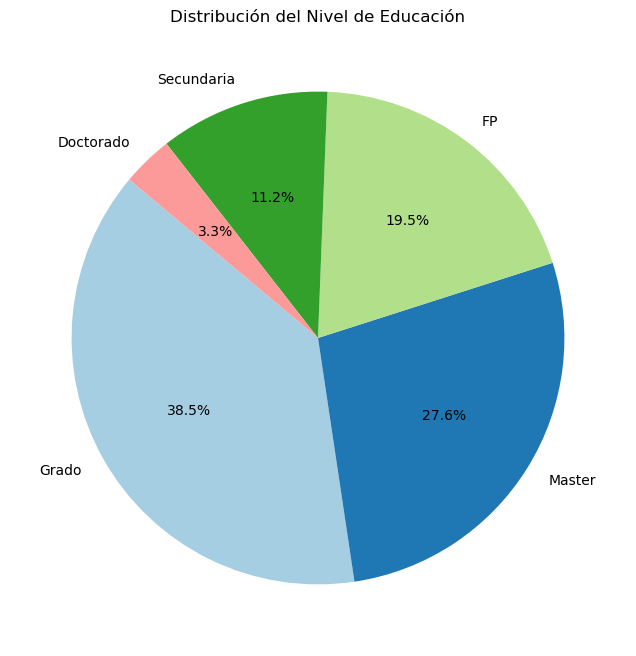

In [34]:
# Contar la cantidad de valores para cada nivel de educación, incluyendo los nulos
education_counts = df["education"].value_counts(dropna=False)

# Reemplazar NaN por "Nulos" en las etiquetas
labels = education_counts.index.astype(str)
labels = ["Nulos" if label == "nan" else label for label in labels]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)

# Título
plt.title("Distribución del Nivel de Educación")

# Mostrar el gráfico
plt.show()


En este gráfico podemos ver cómo el nivel educativo más presente entre los empleados de ABC Corporation es el Grado (38,5%), seguido por Master (27,6%), FP (19,5%), Secundaria (11,2%) y por ultimo Doctorado (solo un 3,3%). 

Estos datos nos muestran que la empresa tiene empleados con una educación bastante avanzada, esto es típico en el sector tecnológico (Grado y Máster). Vemos también que la empresa valora a empleados con formación técnica (FP), posiblemente en areas más técnicas.


In [35]:
# Guardar el DataFrame en el archivo original sobrescribiéndolo
df.to_csv("HR_RAW_DATA_LIMPIO.csv", index=False)

In [36]:
# Paso 1: Verificar si 'educationfield' es nulo y crear una columna booleana
df['educationfield_isnull'] = df['educationfield'].isnull()

# Paso 2: Agrupar por 'education' y calcular el porcentaje de nulos en 'educationfield'
porcentaje_nulos_por_categoria = df.groupby('education')['educationfield_isnull'].mean() * 100

# Mostrar el porcentaje de nulos por categoría de 'education'
print(porcentaje_nulos_por_categoria)

# Paso 3: Ver las filas con 'educationfield' nulo
filas_nulas = df[df['educationfield'].isnull()]
print(filas_nulas[['education', 'educationfield']])

df.drop(columns=['educationfield_isnull'], inplace=True)

education
Doctorado     50.000000
FP            45.859873
Grado         47.020934
Master        44.943820
Secundaria    45.555556
Name: educationfield_isnull, dtype: float64
       education educationfield
0          Grado            NaN
7     Secundaria            NaN
8      Doctorado            NaN
9          Grado            NaN
10    Secundaria            NaN
13         Grado            NaN
15        Master            NaN
16        Master            NaN
17         Grado            NaN
20    Secundaria            NaN
22         Grado            NaN
26    Secundaria            NaN
30    Secundaria            NaN
32         Grado            NaN
35            FP            NaN
36         Grado            NaN
38         Grado            NaN
39        Master            NaN
40         Grado            NaN
41         Grado            NaN
43        Master            NaN
45        Master            NaN
46        Master            NaN
47            FP            NaN
50         Grado          

In [37]:
# Reemplazar valores NaN en la columna "educationfield" con "unknown"
df["educationfield"] = df["educationfield"].fillna("unknown")

# Mostrar los resultados actualizados
print(df[["education", "educationfield"]].head(20))  # Muestra las primeras 20 filas para verificar


     education    educationfield
0        Grado           unknown
1       Master     life sciences
2           FP  technical degree
3       Master           medical
4        Grado  technical degree
5        Grado           medical
6        Grado     life sciences
7   Secundaria           unknown
8    Doctorado           unknown
9        Grado           unknown
10  Secundaria           unknown
11       Grado     life sciences
12       Grado           medical
13       Grado           unknown
14      Master           medical
15      Master           unknown
16      Master           unknown
17       Grado           unknown
18   Doctorado     life sciences
19       Grado     life sciences


In [38]:
# Contar los valores nulos en todo el DataFrame
nulos_totales = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos (mayores que 0)
nulos_mayores_cero = nulos_totales[nulos_totales > 0]

# Mostrar los resultados
print(nulos_mayores_cero)


businesstravel       772
maritalstatus        651
monthlyincome        843
overtime             676
performancerating    195
worklifebalance      108
dtype: int64


In [39]:
# Paso 1: Verificar si 'businesstravel' es nulo y crear una columna booleana
df['businesstravel_isnull'] = df['businesstravel'].isnull()

# Paso 2: Agrupar por 'jobrole' y calcular el porcentaje de nulos en 'businesstravel'
porcentaje_nulos_por_categoria = df.groupby('jobrole')['businesstravel_isnull'].mean() * 100

# Ordenar de mayor a menor para visualizar mejor los resultados
porcentaje_nulos_por_categoria = porcentaje_nulos_por_categoria.sort_values(ascending=False)

# Mostrar el porcentaje de nulos por categoría de 'jobrole'
print(porcentaje_nulos_por_categoria)

# Paso 3: Ver las filas con 'businesstravel' nulo
filas_nulas = df[df['businesstravel'].isnull()]
print(filas_nulas[['jobrole', 'businesstravel']])

df.drop(columns=['businesstravel_isnull'], inplace=True)

jobrole
research director             63.636364
research scientist            54.777070
sales executive               49.864499
manufacturing director        45.569620
manager                       45.045045
laboratory technician         44.964029
sales representative          40.000000
healthcare representative     39.597315
human resources               31.578947
Name: businesstravel_isnull, dtype: float64
                          jobrole businesstravel
0              research director             NaN
1                        manager             NaN
4                sales executive             NaN
5                        manager             NaN
6                sales executive             NaN
8                        manager             NaN
12             research director             NaN
14             research director             NaN
18            research scientist             NaN
21             research director             NaN
22     healthcare representative             NaN


In [40]:
# Reemplazar valores nulos en "businesstravel" con "unknown"
df["businesstravel"] = df["businesstravel"].fillna("unknown")

# Verificar los cambios
print(df["businesstravel"].value_counts())


businesstravel
unknown              772
travel_rarely        586
travel_frequently    165
non-travel            91
Name: count, dtype: int64


In [41]:
df.head(10)

,unnamed:_0,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,0,51,no,unknown,"684,0$",6,Grado,unknown,162,1,hombre,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,3,3,0,0,5,3,20,15,15,19537,1972,1000000000$,yes
1,1,52,no,unknown,"699,0$",1,Master,life sciences,259,3,hombre,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,3,1,1,34,5,3,33,11,9,19999,1971,1000000000$,yes
2,2,42,no,travel_rarely,"532,0$",4,FP,technical degree,319,3,hombre,58,3,5,manager,4,married,"19232,0",4933,1,no,11,3,4,0,22,3,<NA>,22,11,15,19232,1981,1000000000$,yes
3,3,47,no,travel_rarely,"359,0$",2,Master,medical,2069,1,mujer,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,3,2,2,0,2,<NA>,20,5,6,17169,1976,1000000000$,no
4,4,46,no,unknown,"1319,0$",3,Grado,technical degree,2070,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,3,4,1,0,5,3,19,2,8,0,1977,1000000000$,no
5,5,48,no,unknown,"117,0$",22,Grado,medical,1900,4,mujer,58,3,4,manager,4,NaN,"17174,0",2437,3,no,11,3,2,1,0,3,3,22,4,7,17174,1975,1000000000$,yes
6,6,59,no,unknown,"1435,0$",25,Grado,life sciences,81,1,mujer,99,3,3,sales executive,1,NaN,NaN,2354,7,NaN,11,3,4,0,28,3,2,21,7,9,0,1964,1000000000$,yes
7,7,42,no,travel_rarely,"635,0$",1,Secundaria,unknown,387,2,hombre,99,3,2,sales executive,3,married,NaN,24532,1,no,25,4,3,0,20,3,3,20,11,6,0,1981,1000000000$,no
8,8,41,no,unknown,"1276,0$",2,Doctorado,unknown,2071,2,mujer,91,3,4,manager,1,married,"16595,0",5626,7,no,16,3,2,1,22,2,3,18,11,8,16595,1982,1000000000$,yes
9,9,41,no,travel_frequently,"840,0$",9,Grado,unknown,999,1,hombre,64,3,5,research director,3,NaN,NaN,3735,2,no,17,3,2,1,21,2,4,18,0,11,0,1982,1000000000$,no


### GRÁFICO PARA VISUALIZAR LA DISTRIBUCIÓN DEL ESTADO CIVIL:

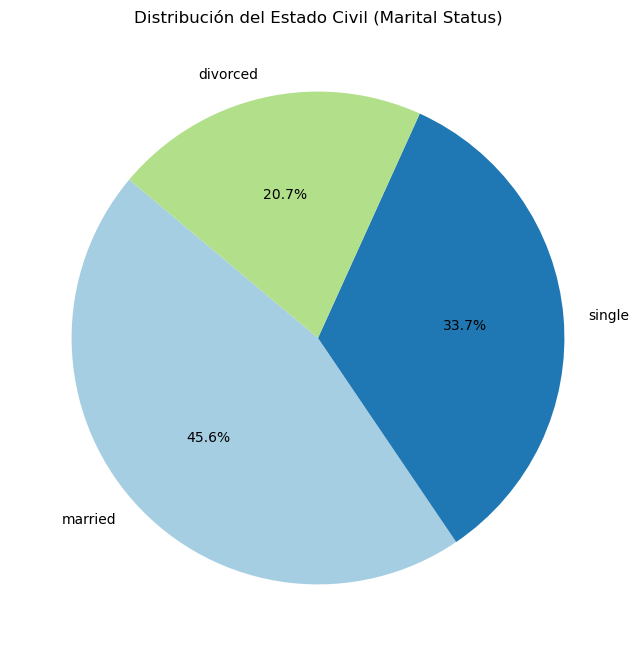

In [42]:

# Contar la cantidad de cada categoría en "maritalstatus"
marital_counts = df["maritalstatus"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)

# Título
plt.title("Distribución del Estado Civil (Marital Status)")

# Mostrar el gráfico
plt.show()


Estos datos nos muestran una situación bastante común en la sociedad actual, con una porcentaje bastante alta de casados (45,6%), a seguir los solteros (33,7%) y por ultimos los divorciados (20,7%).

### DISTRIBUCIÓN POR GÉNERO SEGUN ESTADO CIVIL:

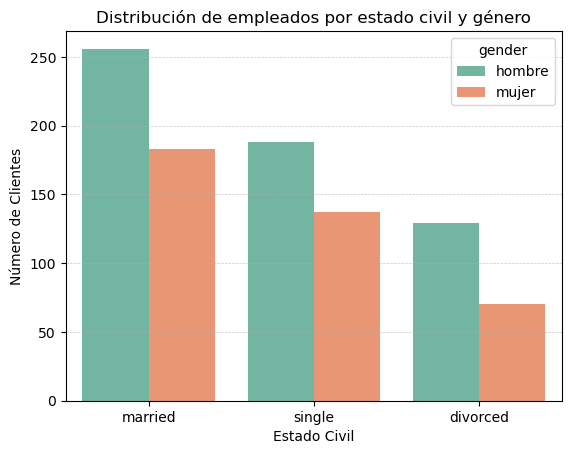

In [43]:
# ¿Cómo se distribuyen los empleados según su estado civil y género? Muestra un gráfico de barras.
# Calcular el conteo de empleados por estado civil y género
marital_gender_count = df.groupby(['maritalstatus', 'gender']).size().reset_index(name='Count')

# Ordenar de mayor a menor por el número de empleados
marital_gender_count = marital_gender_count.sort_values(by='Count', ascending=False)

# Crear el gráfico de barras con el DataFrame ordenado
sns.barplot(x='maritalstatus', y='Count', hue='gender', data=marital_gender_count, palette='Set2')

# Agregar título y etiquetas
plt.title('Distribución de empleados por estado civil y género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()

### DISTRIBUCIÓN EMPLEADOS SEGÚN ROL POR GÉNERO:

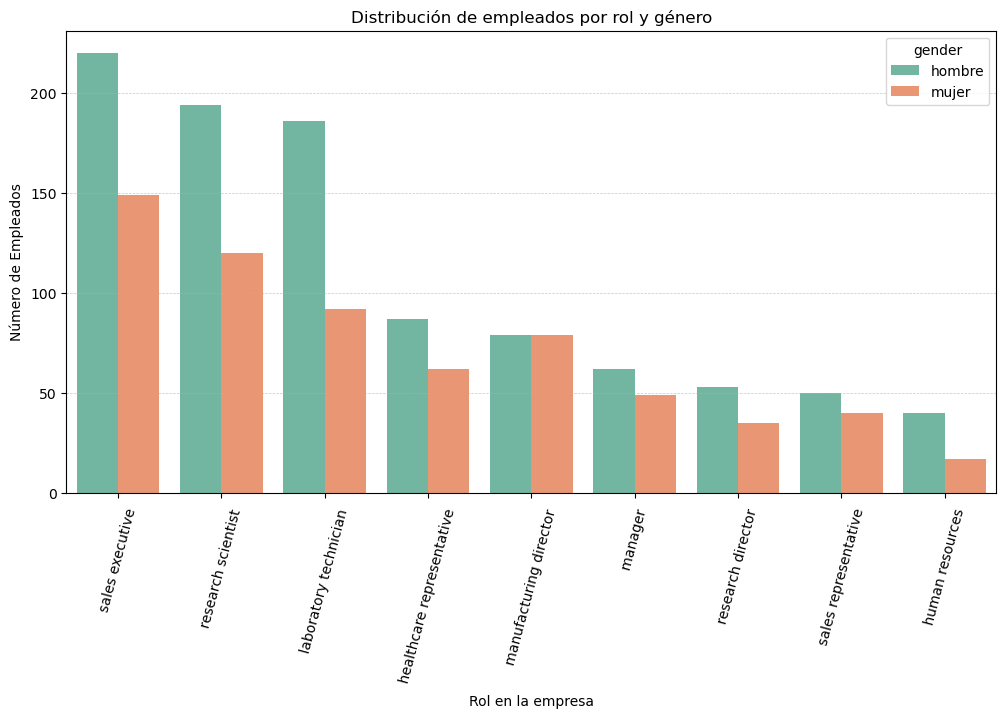

In [44]:

# ¿Cómo se distribuyen los empleados según su rol y género? Muestra un gráfico de barras.
# Calcular el conteo de empleados por rol y género
marital_gender_count = df.groupby(['jobrole', 'gender']).size().reset_index(name='Count')

# Ordenar de mayor a menor por el número de empleados
marital_gender_count = marital_gender_count.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con el DataFrame ordenado
sns.barplot(x='jobrole', y='Count', hue='gender', data=marital_gender_count, palette='Set2')

# Agregar título y etiquetas
plt.title('Distribución de empleados por rol y género')
plt.xlabel('Rol en la empresa')
plt.ylabel('Número de Empleados')

# Girar las etiquetas del eje X
plt.xticks(rotation=75) 

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()

Este grafico nos muestra como la disparidad entre hombres y mujeres es bastante evidente, sobre todo en los roles ejecutivos (los que suelen tener mejores sueldos y más responsabilidad).

In [45]:
# Duplicados

print(df[df.duplicated()]) #identifica duplicados

print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _', '\n')

print([df.duplicated().sum()]) #calcula la cantidad de filas duplicadas en el df

Empty DataFrame
Columns: [unnamed:_0, age, attrition, businesstravel, dailyrate, distancefromhome, education, educationfield, employeenumber, environmentsatisfaction, gender, hourlyrate, jobinvolvement, joblevel, jobrole, jobsatisfaction, maritalstatus, monthlyincome, monthlyrate, numcompaniesworked, overtime, percentsalaryhike, performancerating, relationshipsatisfaction, stockoptionlevel, totalworkingyears, trainingtimeslastyear, worklifebalance, yearsatcompany, yearssincelastpromotion, yearswithcurrmanager, sameasmonthlyincome, datebirth, salary, remotework]
Index: []
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

[0]


In [46]:
# Identificar duplicados en todas las columnas del DataFrame

duplicados_por_columna = df.copy()
for col in df.columns:
    duplicados_por_columna[col] = df[col].duplicated(keep=False)
# Filtrar solo las filas donde al menos una columna tiene un valor duplicado
df_duplicados = df[duplicados_por_columna.any(axis=1)]
# Mostrar los duplicados
print(df_duplicados)


      unnamed:_0  age attrition     businesstravel dailyrate  \
0              0   51        no            unknown    684,0$   
1              1   52        no            unknown    699,0$   
2              2   42        no      travel_rarely    532,0$   
3              3   47        no      travel_rarely    359,0$   
4              4   46        no            unknown   1319,0$   
5              5   48        no            unknown    117,0$   
6              6   59        no            unknown   1435,0$   
7              7   42        no      travel_rarely    635,0$   
8              8   41        no            unknown   1276,0$   
9              9   41        no  travel_frequently    840,0$   
10            10   41        no         non-travel    247,0$   
11            11   56        no      travel_rarely   1369,0$   
12            12   38        no            unknown    201,0$   
13            13   41       yes      travel_rarely   1360,0$   
14            14   55        no         

In [47]:
# Eliminar la primera columna del DataFrame por posición (unkname_0)
df = df.drop(df.columns[0], axis=1)

# Mostrar las primeras filas para verificar
df.head()

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,remotework
0,51,no,unknown,"684,0$",6,Grado,unknown,162,1,hombre,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,3,3,0,0,5,3,20,15,15,19537,1972,1000000000$,yes
1,52,no,unknown,"699,0$",1,Master,life sciences,259,3,hombre,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,3,1,1,34,5,3,33,11,9,19999,1971,1000000000$,yes
2,42,no,travel_rarely,"532,0$",4,FP,technical degree,319,3,hombre,58,3,5,manager,4,married,"19232,0",4933,1,no,11,3,4,0,22,3,<NA>,22,11,15,19232,1981,1000000000$,yes
3,47,no,travel_rarely,"359,0$",2,Master,medical,2069,1,mujer,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,3,2,2,0,2,<NA>,20,5,6,17169,1976,1000000000$,no
4,46,no,unknown,"1319,0$",3,Grado,technical degree,2070,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,3,4,1,0,5,3,19,2,8,0,1977,1000000000$,no


In [48]:
df['salary'].describe().T

count            1614
unique              1
top       1000000000$
freq             1614
Name: salary, dtype: object

In [49]:
df.nunique()

age                           43
attrition                      2
businesstravel                 4
dailyrate                    849
distancefromhome              49
education                      5
educationfield                 7
employeenumber              1510
environmentsatisfaction       38
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome                668
monthlyrate                 1427
numcompaniesworked            10
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifebalance                4
yearsatcompany                37
yearssincelastpromotion       16
yearswithcurrmanager          18
sameasmont

In [50]:
df.dtypes

age                          Int64
attrition                   object
businesstravel              object
dailyrate                   object
distancefromhome             int64
education                   object
educationfield              object
employeenumber               Int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   Int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome               object
monthlyrate                  int64
numcompaniesworked           int64
overtime                    object
percentsalaryhike            int64
performancerating            Int64
relationshipsatisfaction     int64
stockoptionlevel             int64
totalworkingyears            Int64
trainingtimeslastyear        int64
worklifebalance              Int64
yearsatcompany               int64
yearssincelastpromot

Descubrimos que la columna Salary tiene solo un valor, así que no nos sirve:

- monthly income lo que realmente percibe
- monthly rate es igual al salario fijo mensual base

In [51]:
# Limpiar la columna 'dailyrate' para quitar el símbolo '$' y reemplazar la coma con punto
df['dailyrate'] = df['dailyrate'].replace({'\$': '', ',': '.'}, regex=True)

# Convertir la columna 'Dailyrate' de 'object' a 'float'
df['dailyrate'] = df['dailyrate'].astype(float)

# Multiplicar la columna 'Dailyrate' por 0.92
df['dailyrate'] = df['dailyrate'] * 0.92

# Mostrar el DataFrame resultante
print(df)

      age attrition     businesstravel  dailyrate  distancefromhome  \
0      51        no            unknown     629.28                 6   
1      52        no            unknown     643.08                 1   
2      42        no      travel_rarely     489.44                 4   
3      47        no      travel_rarely     330.28                 2   
4      46        no            unknown    1213.48                 3   
5      48        no            unknown     107.64                22   
6      59        no            unknown    1320.20                25   
7      42        no      travel_rarely     584.20                 1   
8      41        no            unknown    1173.92                 2   
9      41        no  travel_frequently     772.80                 9   
10     41        no         non-travel     227.24                 7   
11     56        no      travel_rarely    1259.48                23   
12     38        no            unknown     184.92                10   
13    

In [52]:
#Calcular monthlysalary
df['monthlysalary'] = df['dailyrate'] * 22  # Basado en días hábiles

#Calcular annualsalary
df['annualsalary'] = df['dailyrate'] * 261  # Basado en días laborales del año

#Borrar columna salary
df.drop(columns=['salary'], inplace=True)

#Poner dailyrate con solo 2 decimales
df['dailyrate'] = df['dailyrate'].round(2)

# Mostrar el DataFrame resultante
df.head(10)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,remotework,monthlysalary,annualsalary
0,51,no,unknown,629.28,6,Grado,unknown,162,1,hombre,51,3,5,research director,3,NaN,"19537,0",6462,7,no,13,3,3,0,0,5,3,20,15,15,19537,1972,yes,13844.16,164242.08
1,52,no,unknown,643.08,1,Master,life sciences,259,3,hombre,65,2,5,manager,3,NaN,"19999,0",5678,0,NaN,14,3,1,1,34,5,3,33,11,9,19999,1971,yes,14147.76,167843.88
2,42,no,travel_rarely,489.44,4,FP,technical degree,319,3,hombre,58,3,5,manager,4,married,"19232,0",4933,1,no,11,3,4,0,22,3,<NA>,22,11,15,19232,1981,yes,10767.68,127743.84
3,47,no,travel_rarely,330.28,2,Master,medical,2069,1,mujer,82,3,4,research director,3,married,"17169,0",26703,3,NaN,19,3,2,2,0,2,<NA>,20,5,6,17169,1976,no,7266.16,86203.08
4,46,no,unknown,1213.48,3,Grado,technical degree,2070,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,3,4,1,0,5,3,19,2,8,0,1977,no,26696.56,316718.28
5,48,no,unknown,107.64,22,Grado,medical,1900,4,mujer,58,3,4,manager,4,NaN,"17174,0",2437,3,no,11,3,2,1,0,3,3,22,4,7,17174,1975,yes,2368.08,28094.04
6,59,no,unknown,1320.20,25,Grado,life sciences,81,1,mujer,99,3,3,sales executive,1,NaN,NaN,2354,7,NaN,11,3,4,0,28,3,2,21,7,9,0,1964,yes,29044.40,344572.20
7,42,no,travel_rarely,584.20,1,Secundaria,unknown,387,2,hombre,99,3,2,sales executive,3,married,NaN,24532,1,no,25,4,3,0,20,3,3,20,11,6,0,1981,no,12852.40,152476.20
8,41,no,unknown,1173.92,2,Doctorado,unknown,2071,2,mujer,91,3,4,manager,1,married,"16595,0",5626,7,no,16,3,2,1,22,2,3,18,11,8,16595,1982,yes,25826.24,306393.12
9,41,no,travel_frequently,772.80,9,Grado,unknown,999,1,hombre,64,3,5,research director,3,NaN,NaN,3735,2,no,17,3,2,1,21,2,4,18,0,11,0,1982,no,17001.60,201700.80


In [53]:
df['worklifebalance'].unique

<bound method Series.unique of 0          3
1          3
2       <NA>
3       <NA>
4          3
5          3
6          2
7          3
8          3
9          4
10         3
11         3
12         3
13         3
14         3
15         3
16         3
17         3
18         3
19      <NA>
20         2
21         3
22         3
23         2
24      <NA>
25         3
26         3
27         3
28         3
29         3
30         4
31         3
32         2
33         3
34         3
35         3
36         3
37         3
38         4
39         3
40         3
41         3
42         4
43         3
44         3
45      <NA>
46         2
47         4
48         3
49         3
50         3
51         4
52      <NA>
53         3
54         2
55         2
56         3
57         2
58         4
59         2
60         4
61         3
62         3
63         1
64         3
65         3
66         3
67         3
68         3
69         4
70         3
71         3
72         3
73      <NA>
74     

In [54]:
# Rellenar los valores nulos con cero
df['worklifebalance'] = df['worklifebalance'].fillna(0)
df['worklifebalance'] = df['worklifebalance'].astype('int64')



In [55]:
# Lista de columnas a convertir a float
columns_to_convert = ['distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'worklifebalance']

# Verificar si las columnas existen antes de la conversión
columns_exist = [col for col in columns_to_convert if col in df.columns]

if not columns_exist:
    print("⚠️ Ninguna de las columnas especificadas existe en el DataFrame.")
else:
    # Convertir a float con manejo de errores
    df[columns_exist] = df[columns_exist].apply(pd.to_numeric, errors='coerce')

    # Verificar la conversión
    print(df[columns_exist].dtypes)



distancefromhome      int64
hourlyrate            Int64
monthlyincome       float64
monthlyrate           int64
worklifebalance       int64
dtype: object


In [56]:
# GUARDAR EL DATAFRAME EN EL ARCHIVO ORIGINAL SOBRESCRIBIÉNDOLO
df.to_csv("HR_RAW_DATA_LIMPIO.csv", index=False)

In [57]:
df.head()

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,remotework,monthlysalary,annualsalary
0,51,no,unknown,629.28,6,Grado,unknown,162,1,hombre,51,3,5,research director,3,NaN,NaN,6462,7,no,13,3,3,0,0,5,3,20,15,15,19537,1972,yes,13844.16,164242.08
1,52,no,unknown,643.08,1,Master,life sciences,259,3,hombre,65,2,5,manager,3,NaN,NaN,5678,0,NaN,14,3,1,1,34,5,3,33,11,9,19999,1971,yes,14147.76,167843.88
2,42,no,travel_rarely,489.44,4,FP,technical degree,319,3,hombre,58,3,5,manager,4,married,NaN,4933,1,no,11,3,4,0,22,3,0,22,11,15,19232,1981,yes,10767.68,127743.84
3,47,no,travel_rarely,330.28,2,Master,medical,2069,1,mujer,82,3,4,research director,3,married,NaN,26703,3,NaN,19,3,2,2,0,2,0,20,5,6,17169,1976,no,7266.16,86203.08
4,46,no,unknown,1213.48,3,Grado,technical degree,2070,1,mujer,45,4,4,sales executive,1,divorced,NaN,7739,2,no,12,3,4,1,0,5,3,19,2,8,0,1977,no,26696.56,316718.28


### PASOS A SEGUIR:

- Dividimos a los empleados en los grupos A y B según los criterios establecidos.
- Calculamos la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.
- Realizamos un análisis estadístico para determinar si hay una diferencia significativa en la tasa 
- de rotación entre los grupos A y B.
- Analizamos los resultados.
- Calculamos la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo

Porcentaje de empleados con Attrition = Yes en Grupo A: 13.67%
Porcentaje de empleados con Attrition = Yes en Grupo B: 19.87%


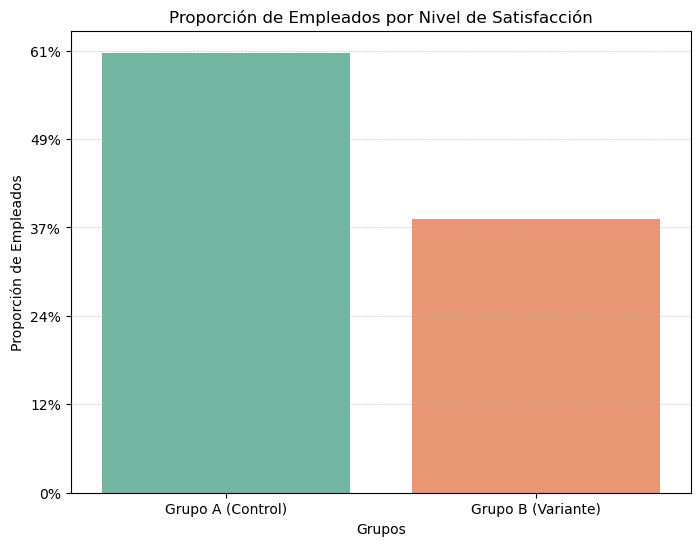

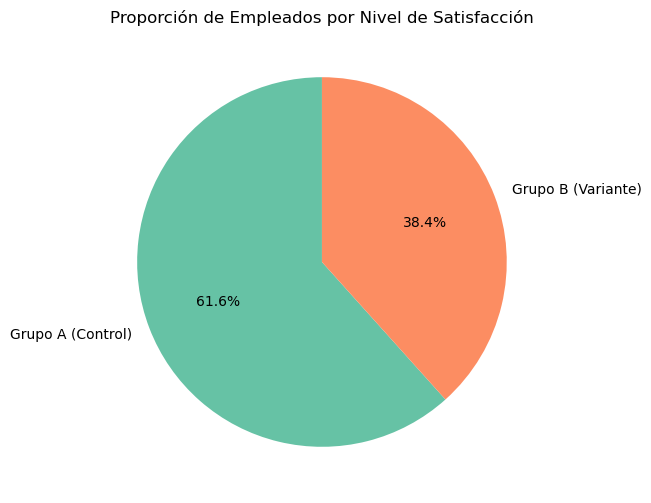

In [58]:

# Clasificar a los empleados en dos grupos según el valor de 'jobsatisfaction'

grupo_a = df[df['jobsatisfaction'] >= 3]  # Grupo A: Satisfacción >= 3
grupo_b = df[(df['jobsatisfaction'] < 3) & (df['jobsatisfaction'] > 0)]  # Grupo B: Satisfacción < 3 y > 0

# Calcular el porcentaje de 'Yes' en cada grupo
grupo_a_yes_percentage = (grupo_a['attrition'].value_counts(normalize=True).get('yes', 0)) * 100
grupo_b_yes_percentage = (grupo_b['attrition'].value_counts(normalize=True).get('yes', 0)) * 100

# Imprimir los resultados
print(f'Porcentaje de empleados con Attrition = Yes en Grupo A: {grupo_a_yes_percentage:.2f}%')
print(f'Porcentaje de empleados con Attrition = Yes en Grupo B: {grupo_b_yes_percentage:.2f}%')

# Contar la cantidad de empleados en cada grupo
grupo_a_count = len(grupo_a)
grupo_b_count = len(grupo_b)

# Crear un DataFrame para las proporciones
grupo_proporciones = pd.Series([grupo_a_count, grupo_b_count], index=['Grupo A (Control)', 'Grupo B (Variante)'])

# Gráfico de barras: Proporción de empleados en cada grupo
plt.figure(figsize=(8, 6))
sns.barplot(x=grupo_proporciones.index, y=grupo_proporciones.values, palette='Set2')

# Cambiar las etiquetas del eje Y a números del 1 al 100 (porcentajes)
plt.gca().set_yticklabels([f'{int(value / grupo_proporciones.sum() * 100)}%' for value in plt.gca().get_yticks()])

# Agregar título y etiquetas
plt.title('Proporción de Empleados por Nivel de Satisfacción')
plt.xlabel('Grupos')
plt.ylabel('Proporción de Empleados')

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()

# Gráfico de pastel: Proporción de empleados en cada grupo
plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set2', len(grupo_proporciones))

# Crear el gráfico de pastel
plt.pie(grupo_proporciones, labels=grupo_proporciones.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Agregar título
plt.title('Proporción de Empleados por Nivel de Satisfacción')

# Mostrar el gráfico
plt.show()


### PORCENTAJE DE SATISFACCIÓN RELACIONADA CON ABANDONO DEL TRABAJO

Porcentaje de empleados con Attrition = Yes en Grupo A: 13.67%
Porcentaje de empleados con Attrition = Yes en Grupo B: 19.87%


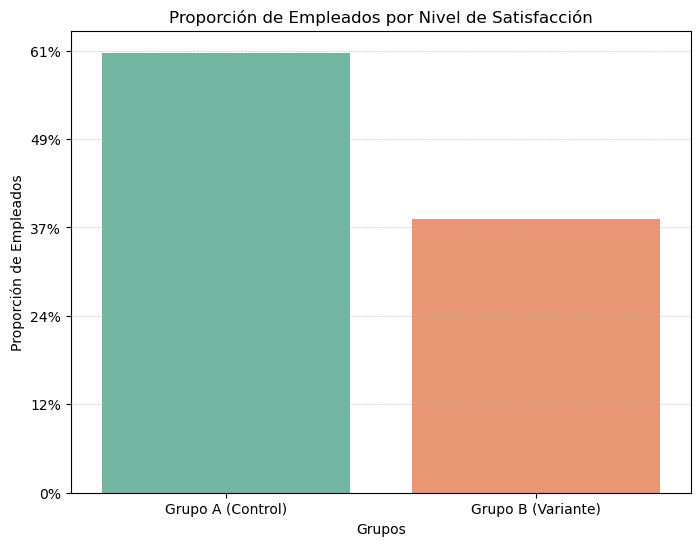

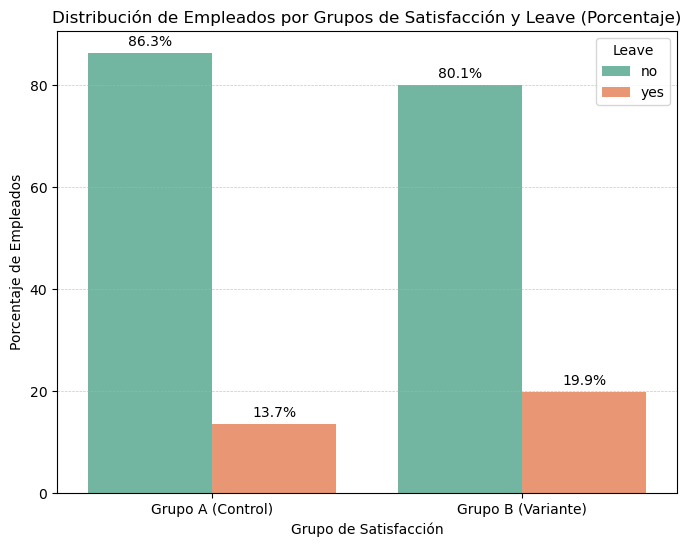

In [59]:

# Clasificar a los empleados en dos grupos según el valor de 'jobsatisfaction'
grupo_a = df[df['jobsatisfaction'] >= 3]  # Grupo A: Satisfacción >= 3
grupo_b = df[(df['jobsatisfaction'] < 3) & (df['jobsatisfaction'] > 0)]  # Grupo B: Satisfacción < 3 y > 0

# Calcular el porcentaje de 'Yes' en cada grupo
grupo_a_yes_percentage = (grupo_a['attrition'].value_counts(normalize=True).get('yes', 0)) * 100
grupo_b_yes_percentage = (grupo_b['attrition'].value_counts(normalize=True).get('yes', 0)) * 100

# Imprimir los resultados
print(f'Porcentaje de empleados con Attrition = Yes en Grupo A: {grupo_a_yes_percentage:.2f}%')
print(f'Porcentaje de empleados con Attrition = Yes en Grupo B: {grupo_b_yes_percentage:.2f}%')

# Contar la cantidad de empleados en cada grupo
grupo_a_count = len(grupo_a)
grupo_b_count = len(grupo_b)

# Crear un DataFrame para las proporciones
grupo_proporciones = pd.Series([grupo_a_count, grupo_b_count], index=['Grupo A (Control)', 'Grupo B (Variante)'])

# Gráfico de barras: Proporción de empleados en cada grupo
plt.figure(figsize=(8, 6))
sns.barplot(x=grupo_proporciones.index, y=grupo_proporciones.values, palette='Set2')

# Cambiar las etiquetas del eje Y a números del 1 al 100 (porcentajes)
plt.gca().set_yticklabels([f'{int(value / grupo_proporciones.sum() * 100)}%' for value in plt.gca().get_yticks()])

# Agregar título y etiquetas
plt.title('Proporción de Empleados por Nivel de Satisfacción')
plt.xlabel('Grupos')
plt.ylabel('Proporción de Empleados')

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()

# ---- NUEVO GRÁFICO: Cantidad de empleados por satisfacción y attrition ----


# Clasificar a los empleados en dos grupos según 'jobsatisfaction'
df['satisfaction_group'] = df['jobsatisfaction'].apply(lambda x: 'Grupo A (Control)' if x >= 3 else 'Grupo B (Variante)')

# Renombrar valores de attrition para que se muestren como 'Leave' y 'Stay'
df['Leave'] = df['attrition'].replace({'Yes': 'Leave', 'No': 'Stay'})

# Agrupar por los nuevos grupos y Leave
df_grouped = df.groupby(['satisfaction_group', 'Leave']).size().reset_index(name='Count')

# Calcular los porcentajes dentro de cada grupo
df_grouped['Percentage'] = df_grouped.groupby('satisfaction_group')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Gráfico de barras apiladas en porcentaje
plt.figure(figsize=(8, 6))
sns.barplot(x='satisfaction_group', y='Percentage', hue='Leave', data=df_grouped, palette='Set2')

# Agregar título y etiquetas
plt.title('Distribución de Empleados por Grupos de Satisfacción y Leave (Porcentaje)')
plt.xlabel('Grupo de Satisfacción')
plt.ylabel('Porcentaje de Empleados')

# Mostrar los valores en cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()



Los datos nos revelan que los empleados con menor satisfacción tienen una probabilidad del 20% de dejar la empresa en comparación con aquellos más satisfechos.

### PORCENTAJE DE EMPLEADOS QUE DEJAN LA EMPRESA CON Y SIN TRABAJO REMOTO:

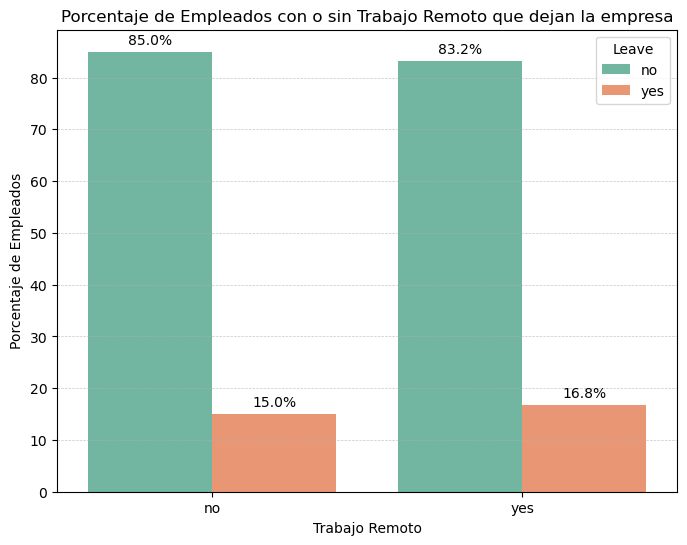

In [78]:
# Renombrar valores de attrition para que se muestren como 'Leave' y 'Stay'
df['Leave'] = df['attrition'].replace({'Yes': 'Leave', 'No': 'Stay'})

# Agrupar por 'remotework' y 'Leave'
df_grouped_remotework = df.groupby(['remotework', 'Leave']).size().reset_index(name='Count')

# Calcular los porcentajes dentro de cada grupo
df_grouped_remotework['Percentage'] = df_grouped_remotework.groupby('remotework')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Gráfico de barras apiladas en porcentaje
plt.figure(figsize=(8, 6))
sns.barplot(x='remotework', y='Percentage', hue='Leave', data=df_grouped_remotework, palette='Set2')

# Agregar título y etiquetas
plt.title('Porcentaje de Empleados con o sin Trabajo Remoto que dejan la empresa')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Porcentaje de Empleados')

# Mostrar los valores en cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()


### VISUALIZAMOS EL SALARIO PROMEDIO SEGÚN EDUCACIÓN:

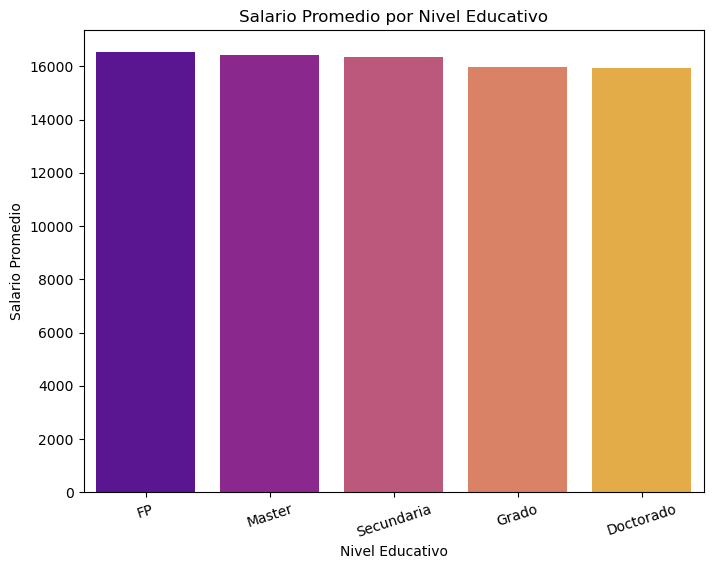

In [61]:

# Calcular el salario promedio por nivel educativo sin sobrescribir df original
salary_avg = df.groupby('education', as_index=False)['monthlysalary'].mean()

# Ordenar de mayor a menor por salario
salary_avg = salary_avg.sort_values(by='monthlysalary', ascending=False)

# Crear un gráfico de barras para mostrar el salario promedio por nivel educativo
plt.figure(figsize=(8, 6))
sns.barplot(x='education', y='monthlysalary', data=salary_avg, palette='plasma')

# Agregar título y etiquetas
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')

# Girar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=18)

# Mostrar el gráfico
plt.show()


### DISTRIBUCIÓN DE EMPLEADOS POR AÑOS EN LA EMPRESA Y ABANDONO DE TRABAJO:

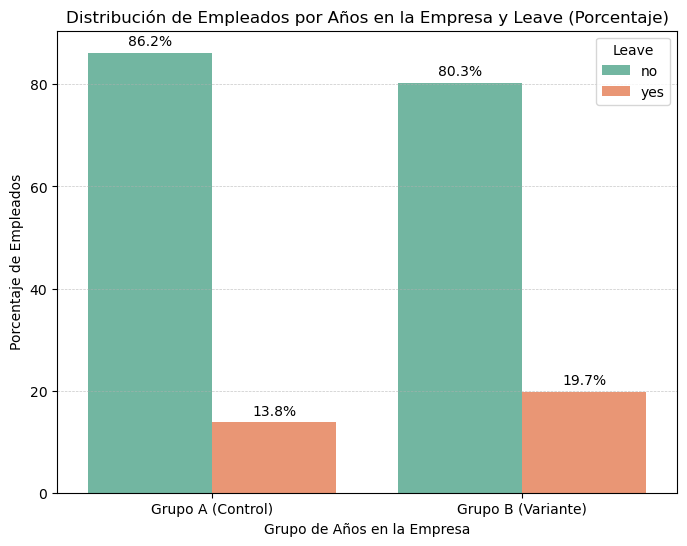

In [62]:
# Clasificar a los empleados en grupos según 'totalworkingyears'
df['years_group'] = df['totalworkingyears'].apply(lambda x: 'Grupo A (Control)' if x >= 3 else 'Grupo B (Variante)')

# Renombrar valores de attrition para que se muestren como 'Leave' y 'Stay'
df['Leave'] = df['attrition'].replace({'Yes': 'Leave', 'No': 'Stay'})

# Agrupar por los nuevos grupos de años en la empresa y Leave
df_grouped = df.groupby(['years_group', 'Leave']).size().reset_index(name='Count')

# Calcular los porcentajes dentro de cada grupo
df_grouped['Percentage'] = df_grouped.groupby('years_group')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Gráfico de barras apiladas en porcentaje
plt.figure(figsize=(8, 6))
sns.barplot(x='years_group', y='Percentage', hue='Leave', data=df_grouped, palette='Set2')

# Agregar título y etiquetas
plt.title('Distribución de Empleados por Años en la Empresa y Leave (Porcentaje)')
plt.xlabel('Grupo de Años en la Empresa')
plt.ylabel('Porcentaje de Empleados')

# Mostrar los valores en cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

# Activar la cuadrícula
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar el gráfico
plt.show()


### PORCENTAJE DE EMPLEADOS QUE DEJAN LA EMPRESA SEGÚN ANTIGUEDAD:

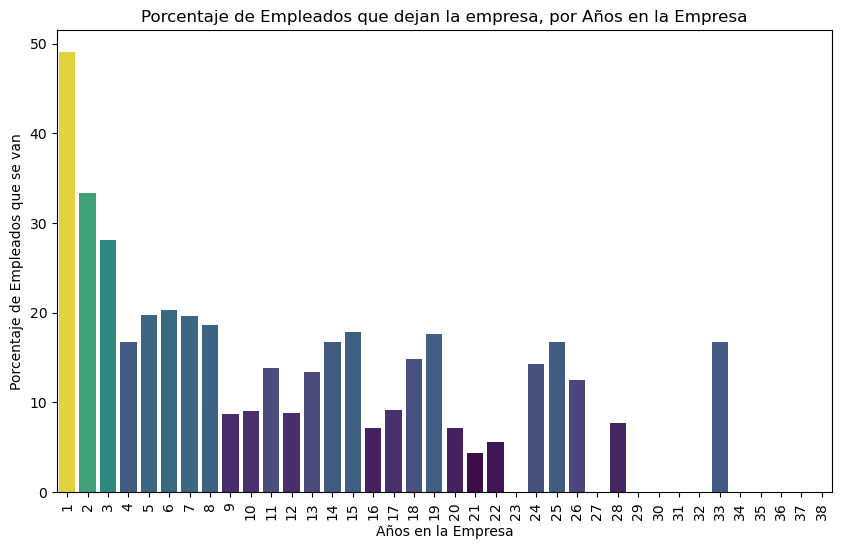

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Calcular el porcentaje de 'Yes' en 'attrition' para cada 'totalworkingyears'
attrition_percentage = df.groupby('totalworkingyears')['attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_percentage['Yes_Percentage'] = attrition_percentage['yes'] * 100  # Convertir a porcentaje

# Filtrar los datos para excluir el valor 40 y el valor 0 de 'totalworkingyears'
attrition_percentage = attrition_percentage[(attrition_percentage['totalworkingyears'] != 0) & 
                                            (attrition_percentage['totalworkingyears'] != 40)]

# Crear un mapa de color (colormap) que cambie dependiendo del valor de Y (Yes_Percentage)
norm = mpl.colors.Normalize(vmin=attrition_percentage['Yes_Percentage'].min(), vmax=attrition_percentage['Yes_Percentage'].max())
cmap = mpl.cm.viridis  # Se puede cambiar a cualquier otro mapa de colores

# Obtener la lista de colores basados en el colormap
colors = [cmap(norm(value)) for value in attrition_percentage['Yes_Percentage']]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='totalworkingyears', y='Yes_Percentage', data=attrition_percentage, palette=colors)

# Agregar etiquetas y título
plt.title('Porcentaje de Empleados que dejan la empresa, por Años en la Empresa')
plt.xlabel('Años en la Empresa')
plt.ylabel('Porcentaje de Empleados que se van')

# Girar las etiquetas del eje X
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


La proporción entre abandono laboral y años en la empresa es casi inversamente proporcional, o sea, los empleados que llevan menos tiempo en la empresa se van más.

Esto parece seguir una tendencia común en muchas empresas, donde los empleados que han estado menos tiempo en la organización tienden a tener una mayor tasa de rotación, mientras que los empleados que permanecen más tiempo tienden a quedarse por más tiempo y, por lo general, tienen un menor porcentaje de abandono.

El abandono temprano puede ser debido a varios factores:

- Falta de adaptación, dificultad a integrarse en la empresa

- Busqueda de mejores oprtunidades y exploración de otras áreas

- Expectativa vs. realidad, decepción que lleva a desmotivación y abandono.

La disminución progresiva del abandono con el paso de los años, podría deberse a:

- Estabilidad laboral (más compromiso con la empresa)

- Beneficios y recompensas (nivel más alto en la escala salarial)

- Desarrollo profesional (sentido de pertenencia y desarrollo de la carrera)

Los picos y valles en los años intermedios pueden deberse a:

- Reestructuraciones internas (fusiones, cambios de dirección y organizacionales)

- Condiciones del mercado (competitividad en el mercado y conseguente busqueda de otras oportunidades)

- Factores personales (divorcios, cambios familiares, mudanzas, etc)

### PORCENTAJE DE EMPLEADOS QUE DEJAN LA EMPRESA POR DISTANCIA DEL PUESTO DE TRABAJO:

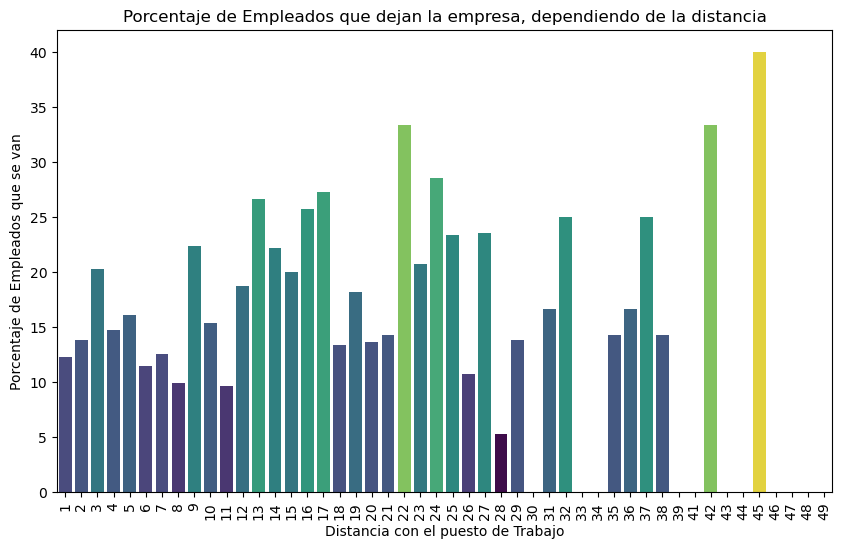

In [64]:

# Calcular el porcentaje de 'Yes' en 'attrition' para cada 'distancefromhome'
attrition_percentage = df.groupby('distancefromhome')['attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_percentage['Yes_Percentage'] = attrition_percentage['yes'] * 100  # Convertir a porcentaje

# Filtrar los datos para excluir el valor 40 y el valor 0 de 'distancefromhome'
attrition_percentage = attrition_percentage[(attrition_percentage['distancefromhome'] != 0) & 
                                            (attrition_percentage['distancefromhome'] != 40)]

# Crear un mapa de color (colormap) que cambie dependiendo del valor de Y (Yes_Percentage)
norm = mpl.colors.Normalize(vmin=attrition_percentage['Yes_Percentage'].min(), vmax=attrition_percentage['Yes_Percentage'].max())
cmap = mpl.cm.viridis  # Se puede cambiar a cualquier otro mapa de colores

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='distancefromhome', y='Yes_Percentage', data=attrition_percentage, palette=cmap(norm(attrition_percentage['Yes_Percentage'])))

# Agregar etiquetas y título
plt.title('Porcentaje de Empleados que dejan la empresa, dependiendo de la distancia')
plt.xlabel('Distancia con el puesto de Trabajo')
plt.ylabel('Porcentaje de Empleados que se van')

# Girar las etiquetas del eje X
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

En este gráfico vemos que la relación es directa, es decir, a medida que aumenta la distancia entre el hogar y el trabajo, también aumenta el abandono laboral.

Vamos a desglosar los puntos clave:

1. Alta tasa de abandono en distancias largas:

- El abandono es más alto cuando los empleados se encuentran a 45 km de distancia de la empresa, con un porcentaje de casi el 40% de abandono.

- A medida que la distancia aumenta, es probable que el cansancio del viaje o el estrés de desplazarse tan lejos haga que los empleados se sientan menos motivados y más inclinados a abandonar el puesto.

2. Baja tasa de abandono en distancias cortas:

- En cambio, cuando los empleados viven a distancias más cortas, como 1 km, el abandono disminuye significativamente, llegando a alrededor de 15%.

3. Picos y valles:

- Picos atípicos: El 34% de abandono a los 22 km es un pico inusual, y el mínimo de 5% a los 28 km también es interesante. Estos puntos fuera de la tendencia podrían estar influenciados por factores específicos de la empresa, el entorno laboral o las características particulares de los empleados en esas distancias.

### PORCENTAJE DE EMPLEADOS QUE DEJAN LA EMPRESA SEGÚN EDAD:

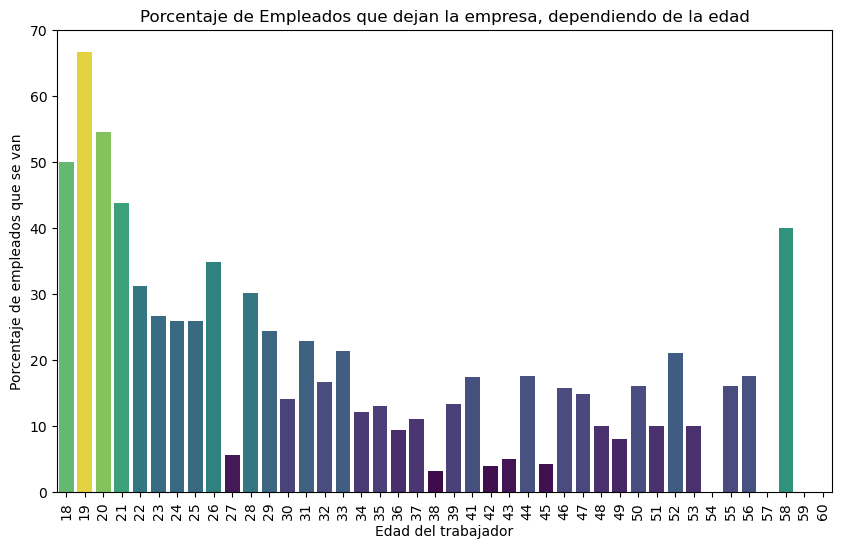

In [65]:
# Calcular el porcentaje de 'Yes' en 'attrition' para cada 'age'
attrition_percentage = df.groupby('age')['attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_percentage['Yes_Percentage'] = attrition_percentage['yes'] * 100  # Convertir a porcentaje

# Filtrar los datos para excluir el valor 40 y el valor 0 de 'age'
attrition_percentage = attrition_percentage[(attrition_percentage['age'] != 0) & 
                                            (attrition_percentage['age'] != 40)]

# Crear un mapa de color (colormap) que cambie dependiendo del valor de Y (Yes_Percentage)
norm = mpl.colors.Normalize(vmin=attrition_percentage['Yes_Percentage'].min(), vmax=attrition_percentage['Yes_Percentage'].max())
cmap = mpl.cm.viridis  # Se puede cambiar a cualquier otro mapa de colores

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='Yes_Percentage', data=attrition_percentage, palette=cmap(norm(attrition_percentage['Yes_Percentage'])))

# Agregar etiquetas y título
plt.title('Porcentaje de Empleados que dejan la empresa, dependiendo de la edad')
plt.xlabel('Edad del trabajador')
plt.ylabel('Porcentaje de empleados que se van')

# Girar las etiquetas del eje X
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

### SALARIO ANUAL PROMEDIO SEGÚN EDAD:

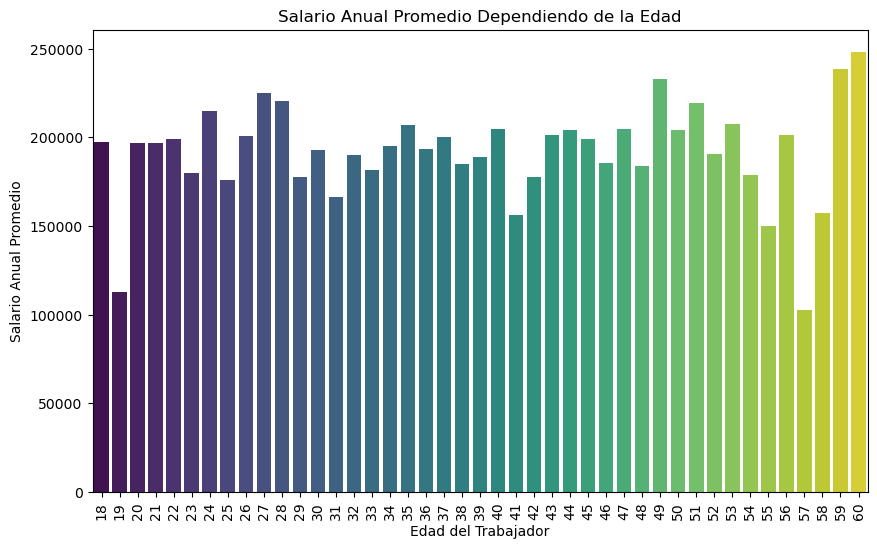

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la media de 'annualsalary' dependiendo de 'age'
salary_avg_by_age = df.groupby('age')['annualsalary'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='annualsalary', data=salary_avg_by_age, palette='viridis')

# Agregar etiquetas y título
plt.title('Salario Anual Promedio Dependiendo de la Edad')
plt.xlabel('Edad del Trabajador')
plt.ylabel('Salario Anual Promedio')

# Girar las etiquetas del eje X si es necesario
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


### PORCENTAJE DE EMPLEADOS QUE DEJAN LA EMPRESA DEPENDIENDO DE LOS AÑOS DESDE AL ÚLTIMA PROMOCIÓN:

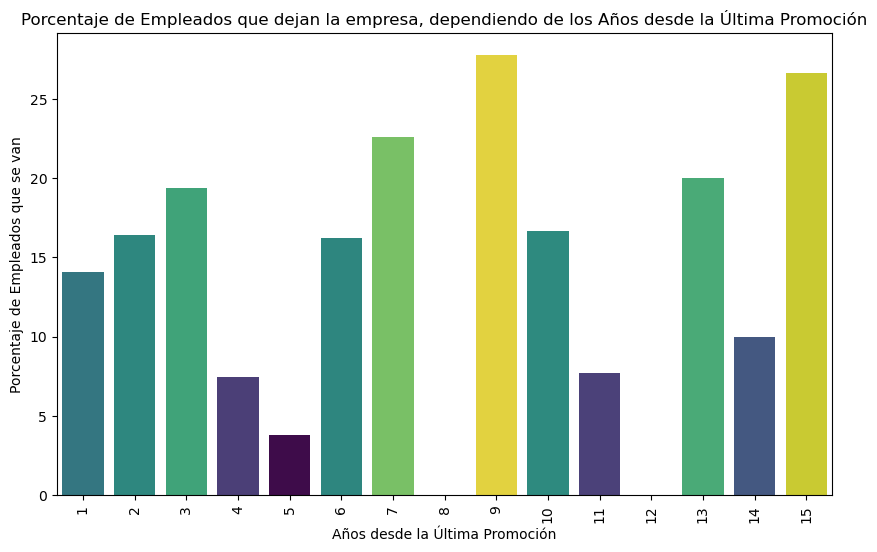

In [67]:


# Calcular el porcentaje de 'Yes' en 'attrition' para cada 'yearssincelastpromotion'
attrition_percentage = df.groupby('yearssincelastpromotion')['attrition'].value_counts(normalize=True).unstack().reset_index()
attrition_percentage['Yes_Percentage'] = attrition_percentage['yes'] * 100  # Convertir a porcentaje

# Filtrar los datos para excluir el valor 0 y el valor 40 de 'yearssincelastpromotion'
attrition_percentage = attrition_percentage[(attrition_percentage['yearssincelastpromotion'] != 0) & 
                                            (attrition_percentage['yearssincelastpromotion'] != 40)]

# Crear un mapa de color (colormap) que cambie dependiendo del valor de Y (Yes_Percentage)
norm = mpl.colors.Normalize(vmin=attrition_percentage['Yes_Percentage'].min(), vmax=attrition_percentage['Yes_Percentage'].max())
cmap = mpl.cm.viridis  # Se puede cambiar a cualquier otro mapa de colores

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='yearssincelastpromotion', y='Yes_Percentage', data=attrition_percentage, palette=cmap(norm(attrition_percentage['Yes_Percentage'])))

# Agregar etiquetas y título
plt.title('Porcentaje de Empleados que dejan la empresa, dependiendo de los Años desde la Última Promoción')
plt.xlabel('Años desde la Última Promoción')
plt.ylabel('Porcentaje de Empleados que se van')

# Girar las etiquetas del eje X
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


En general, la falta de progreso en la carrera (como no recibir promociones) suele ser un factor significativo de desmotivación para muchos empleados. Esto puede llevar a sentimientos de estancamiento o de que no hay oportunidades de crecimiento, lo cual podría contribuir al abandono.

En especial, a los 9 años sin promoción parece haber un pico de frustración, lo que puede sugerir que después de este tiempo, los empleados pierden la esperanza de obtener una promoción o sienten que su carrera está parada. Este podría ser el pico de insatisfacción más alto, ya que la expectativa de mejora a largo plazo no se ha cumplido.

Los picos y valles indican que el abandono no sigue una tendencia uniforme, sino que está influenciado por otros factores internos de la empresa (por ejemplo, cambios en la estructura o en el ambiente laboral) y circunstancias personales de los empleados.

La falta de promoción es un factor importante en la decisión de abandonar la empresa, pero no es el único. Otros elementos como la satisfacción en el trabajo, condiciones laborales, oportunidades de desarrollo personal y la competencia laboral también influyen en las decisiones de los empleados.

In [68]:
# Obtener los valores únicos que están duplicados
valores_duplicados_unicos = df['employeenumber'][df['employeenumber'].duplicated()].count()

# Mostrar los valores únicos duplicados
print(valores_duplicados_unicos)

104


In [69]:

# Cargar el archivo CSV
df = pd.read_csv('HR_RAW_DATA_LIMPIO.csv')

# Verificar si hay duplicados en la columna 'employeenumber'
duplicates = df[df.duplicated(subset='employeenumber', keep=False)]

# Mostrar los duplicados
if not duplicates.empty:
    print(f"Se encontraron {len(duplicates)} filas con 'employeenumber' duplicados:")
    print(duplicates[['employeenumber']])
else:
    print("No se encontraron duplicados en la columna 'employeenumber'.")


Se encontraron 208 filas con 'employeenumber' duplicados:
      employeenumber
82               307
84               374
89               524
90               569
100             1541
299              376
300              381
301              388
302              389
303              401
304              416
305              430
306              438
308              446
309              448
310              454
311              458
314              476
315              483
316              488
317              500
320              534
323              586
324              595
326              608
327              616
328              621
329              653
330              663
331              682
335              710
336              717
337              721
338              722
339              724
340              725
342              728
343              733
344              734
346              742
347              747
348              762
349              783
350              7

In [70]:
# Cargar el DataFrame
df = pd.read_csv('HR_RAW_DATA_LIMPIO.csv')

# Encontrar las filas donde 'employeenumber' está duplicado
duplicated_employeenumbers = df[df.duplicated(subset='employeenumber', keep=False)]

# Mostrar las filas duplicadas en 'employeenumber'
if not duplicated_employeenumbers.empty:
    print(f"Se encontraron {len(duplicated_employeenumbers)} filas con duplicados en 'employeenumber':")
    print(duplicated_employeenumbers[['employeenumber']])
else:
    print("No se encontraron duplicados en 'employeenumber'.")


Se encontraron 208 filas con duplicados en 'employeenumber':
      employeenumber
82               307
84               374
89               524
90               569
100             1541
299              376
300              381
301              388
302              389
303              401
304              416
305              430
306              438
308              446
309              448
310              454
311              458
314              476
315              483
316              488
317              500
320              534
323              586
324              595
326              608
327              616
328              621
329              653
330              663
331              682
335              710
336              717
337              721
338              722
339              724
340              725
342              728
343              733
344              734
346              742
347              747
348              762
349              783
350            

In [71]:
# Encontrar las filas duplicadas completas para los 'employeenumber' duplicados
duplicated_complete_rows = duplicated_employeenumbers[duplicated_employeenumbers.duplicated(keep=False)]

# Mostrar las filas completas duplicadas
if not duplicated_complete_rows.empty:
    print(f"Se encontraron {len(duplicated_complete_rows)} filas completas duplicadas para los 'employeenumber' duplicados:")
    print(duplicated_complete_rows)
else:
    print("No se encontraron duplicados completos entre las filas con 'employeenumber' duplicados.")


Se encontraron 64 filas completas duplicadas para los 'employeenumber' duplicados:
      age attrition     businesstravel  dailyrate  distancefromhome  \
82     38        no            unknown     109.48                 3   
84     55        no      travel_rarely     415.84                 1   
301    29        no  travel_frequently     406.64                 2   
315    40        no      travel_rarely    1077.32                10   
320    41        no      travel_rarely     593.40                 1   
324    48        no      travel_rarely     149.96                 2   
326    26       yes  travel_frequently     391.92                17   
327    41        no            unknown     468.28                 2   
331    53        no            unknown     218.96                 1   
337    39        no            unknown     375.36                 2   
338    32        no            unknown     854.68                10   
343    27        no  travel_frequently     270.48                

In [72]:

# Cargar el DataFrame (ajusta la ruta si es necesario)
df = pd.read_csv('HR_RAW_DATA_LIMPIO.csv')

# Asegurarnos de que el número de filas en el DataFrame sea igual o menor que 1614
num_rows = len(df)

if num_rows > 1614:
    print("Error: El DataFrame tiene más de 1614 filas, no se puede asignar un número único para cada fila.")
else:
    # Crear un rango de números únicos de 1 a 1614
    unique_numbers = list(range(1, num_rows + 1))

    # Reemplazar los valores de 'employeenumber' con estos números únicos
    df['employeenumber'] = unique_numbers

    # Verificar que los valores son únicos
    if df['employeenumber'].is_unique:
        print("La columna 'employeenumber' ahora tiene valores únicos.")
    else:
        print("Hubo un problema al asignar valores únicos.")
    
    # Mostrar el DataFrame con los nuevos valores de 'employeenumber'
    print(df[['employeenumber']].head())


La columna 'employeenumber' ahora tiene valores únicos.
   employeenumber
0               1
1               2
2               3
3               4
4               5


In [73]:
# Obtener los valores únicos que están duplicados
valores_duplicados_unicos = df['employeenumber'][df['employeenumber'].duplicated()].count()

# Mostrar los valores únicos duplicados
print(valores_duplicados_unicos)

0


In [74]:
#TRANSFORMAR CSV A ARCHIVO SQL


# Cargar el archivo CSV
csv_file = 'HR_RAW_DATA_LIMPIO.csv'
df = pd.read_csv(csv_file)

# Nombre de la tabla en SQL
table_name = 'empleados'

# Función para determinar el tipo de dato SQL adecuado
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_object_dtype(dtype):
        return "VARCHAR(255)"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "VARCHAR(255)"  # Por defecto

# Crear la sentencia SQL para la creación de la tabla
columns_sql = []
for column, dtype in df.dtypes.items():
    sql_type = get_sql_type(dtype)
    columns_sql.append(f"{column} {sql_type}")

# Crear la sentencia CREATE TABLE
create_table_sql = f"CREATE TABLE {table_name} (\n"
create_table_sql += ",\n".join(columns_sql)
create_table_sql += "\n);\n\n"

# Crear las sentencias INSERT INTO para cada fila de datos
insert_statements = []
for index, row in df.iterrows():
    values = ', '.join([f"'{str(value)}'" if isinstance(value, str) else str(value) for value in row])
    insert_statements.append(f"INSERT INTO {table_name} ({', '.join(df.columns)}) VALUES ({values});")

# Escribir todo en un archivo SQL
with open('HR_RAW_DATA_LIMPIO.sql', 'w', encoding='utf-8') as sql_file:
    sql_file.write(create_table_sql)
    sql_file.write("\n".join(insert_statements))

print("Archivo SQL generado exitosamente como HR_RAW_DATA_LIMPIO.sql")

Archivo SQL generado exitosamente como HR_RAW_DATA_LIMPIO.sql


In [75]:
# Leer el archivo SQL generado
with open('HR_RAW_DATA_LIMPIO.sql', 'r', encoding='utf-8') as sql_file:
    sql_content = sql_file.readlines()

# Filtrar las sentencias INSERT INTO
insert_statements = [line.strip() for line in sql_content if line.startswith('INSERT INTO')]

# Extraer los employeenumber de las sentencias INSERT INTO
employeenumbers = []
for statement in insert_statements:
    # Extraer los valores de los paréntesis de cada sentencia INSERT
    values = statement.split("VALUES")[1].strip()[1:-2]  # Elimina los paréntesis y comillas
    employeenumbers.append(int(values.split(",")[0]))  # El primer valor corresponde a 'employeenumber'

# Verificar duplicados en employeenumber
duplicates = [num for num in employeenumbers if employeenumbers.count(num) > 1]
if duplicates:
    print(f"Se encontraron duplicados: {set(duplicates)}")
else:
    print("No se encontraron duplicados.")


Se encontraron duplicados: {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}


In [76]:
# Verificar si los valores de 'employeenumber' tienen espacios o caracteres extraños
df['employeenumber'] = df['employeenumber'].astype(str).str.strip()

# Verificar el tipo de dato de 'employeenumber'
print(df['employeenumber'].dtype)


object


In [77]:
# Cargar el archivo CSV
csv_file = 'HR_RAW_DATA_LIMPIO.csv'
df = pd.read_csv(csv_file)

# Eliminar filas duplicadas basadas en todas las columnas (asegurarse de que no haya duplicados generales)
df = df.drop_duplicates()

# Asegurarse de que la columna 'employeenumber' es única, si no, asignar valores únicos
if df['employeenumber'].duplicated().any():
    print("Se han encontrado duplicados en 'employeenumber'. Se corregirán.")
    # Crear nuevos valores únicos para 'employeenumber', si fuera necesario
    df['employeenumber'] = range(1, len(df) + 1)

# Nombre de la tabla en SQL
table_name = 'empleados'

# Función para determinar el tipo de dato SQL adecuado
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_object_dtype(dtype):
        return "VARCHAR(255)"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "VARCHAR(255)"  # Por defecto

# Crear la sentencia SQL para la creación de la tabla
columns_sql = []
for column, dtype in df.dtypes.items():
    sql_type = get_sql_type(dtype)
    columns_sql.append(f"{column} {sql_type}")

# Crear la sentencia CREATE TABLE
create_table_sql = f"CREATE TABLE {table_name} (\n"
create_table_sql += ",\n".join(columns_sql)
create_table_sql += "\n);\n\n"

# Crear las sentencias INSERT INTO para cada fila de datos
insert_statements = []
for index, row in df.iterrows():
    values = ', '.join([f"'{str(value)}'" if isinstance(value, str) else str(value) for value in row])
    insert_statements.append(f"INSERT INTO {table_name} ({', '.join(df.columns)}) VALUES ({values});")

# Escribir todo en un archivo SQL
with open('HR_RAW_DATA_LIMPIO.sql', 'w', encoding='utf-8') as sql_file:
    sql_file.write(create_table_sql)
    sql_file.write("\n".join(insert_statements))

print("Archivo SQL generado exitosamente como HR_RAW_DATA_LIMPIO.sql")


Se han encontrado duplicados en 'employeenumber'. Se corregirán.
Archivo SQL generado exitosamente como HR_RAW_DATA_LIMPIO.sql
